## Assigment 2



In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.ensemble import RandomForestRegressor
import random
from matplotlib.pyplot import plot

from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn import datasets, ensemble
from prophet import Prophet










### Data Loading

WE load 100 random data samples from Lamah Dataset

In [2]:
# Path to the folder containing the CSV files
folder_path = '/content'

lamah_df = pd.read_csv('/content/24_gauge.csv')

In [3]:

print(lamah_df.head())

         date  2m_temp_max  2m_temp_mean  2m_temp_min  2m_dp_temp_max  \
0  1981-01-01         -5.2          -7.1         -9.4            -8.2   
1  1981-01-02         -7.2          -8.7        -10.0            -9.3   
2  1981-01-03         -3.0          -4.9         -7.8            -4.4   
3  1981-01-04         -3.5          -5.2         -8.0            -4.5   
4  1981-01-05         -8.1         -11.0        -12.2           -10.0   

   2m_dp_temp_mean  2m_dp_temp_min  10m_wind_u  10m_wind_v  fcst_alb  ...  \
0            -11.5           -14.3         1.7        -1.0      0.44  ...   
1            -10.5           -12.3         1.7        -0.8      0.45  ...   
2             -6.3            -9.0         1.0         0.1      0.45  ...   
3             -6.8            -9.8         1.2        -0.9      0.45  ...   
4            -13.2           -15.5         1.7        -1.4      0.46  ...   

      swe  surf_net_solar_rad_max  surf_net_solar_rad_mean  \
0  255.74                     122   

In [4]:
for column in lamah_df.columns:
    unique_values = lamah_df[column].unique()
    print(f"Column: {column}")

    print(f"Unique Values ({len(unique_values)}): {unique_values}\n")


Column: date
Unique Values (14244): ['1981-01-01' '1981-01-02' '1981-01-03' ... '2019-12-29' '2019-12-30'
 '2019-12-31']

Column: 2m_temp_max
Unique Values (430): [ -5.2  -7.2  -3.   -3.5  -8.1  -9.8 -12.6 -16.4 -12.1  -6.9  -7.9  -9.
 -10.7  -7.5  -7.3  -6.7  -6.8  -8.5  -9.4  -3.7  -3.2  -8.4  -9.5  -4.5
  -1.7  -1.4   1.6   0.6   0.2  -0.5   2.1   3.7   0.4  -5.9 -10.3  -4.8
  -7.4  -5.7  -5.3  -3.3  -1.9  -2.7  -4.6  -6.1  -6.6  -3.1  -0.1   1.2
  -1.3   4.8   5.    4.7   1.8   1.   -0.6  -2.9  -2.4   5.7   5.5   3.9
   4.6   5.6   7.9   4.    6.7   5.8   6.    7.7   6.4  11.1   7.4   3.2
   6.8   7.6   8.4   6.9   7.8   8.8  12.6   8.9  10.1   5.4   0.   -4.4
  -2.5   0.7   4.1   3.6   2.7   5.2   6.5  -1.8   0.8   3.8   4.2   2.5
   1.1   2.3   9.6  11.5  10.   11.2   8.6   4.9   7.5   9.   12.1  14.5
  13.6  17.2  10.5  10.7  11.7  10.8   8.7  17.7  19.5  21.1  22.   14.3
   9.9  10.6  14.4  18.4  20.4  18.7  19.1  12.5  18.   18.2  10.3   2.8
   2.    7.1  13.3  12.9  18.1  21.

### Data Exploration

In this part, we intend to check


*   Data types
*   Data Distribution

*   Missing Data
*   Possible outliers







In [5]:
categorical_data = lamah_df.select_dtypes(include=['object']).columns.tolist()
num_data = lamah_df.select_dtypes(include=['int','float']).columns.tolist()

print(f"Number of categorical colums in dataset is {len(categorical_data)}")
print(f"Number of numerical colums in dataset is {len(num_data)}")



Number of categorical colums in dataset is 1
Number of numerical colums in dataset is 21



#### Data Types

*   YYYY (Year)	int	Ordinal - Years are sequential; they have a meaningful  
     order but no true zero.


*   MM (Month)	int	Ordinal	Represents months in a year with a natural order.

*   DD (Day)	int	Ordinal	Represents days in a month with a natural order.

*   DOY (Day of the Year)	int	Ordinal	Represents sequential days in a year;   
      meaningful order exists.

*   2m_temp_max	float	Ratio	Maximum temperature; has a true zero and  
       differences are meaningful.

*   2m_temp_mean	float	Ratio	Mean temperature; same properties as above.
*   List item.

*   2m_temp_min	float	Ratio	Minimum temperature; same properties as above.

*   2m_dp_temp_max	float	Ratio	Maximum dew point temperature; meaningful     
     differences and true zero.

*   2m_dp_temp_mean	float	Ratio	Mean dew point temperature; same properties as  
     above.

*   2m_dp_temp_min	float	Ratio	Minimum dew point temperature; same properties
     as above.

*   10m_wind_u	float	Ratio	Wind speed component (u-direction); has true zero

*   10m_wind_v	float	Ratio	Wind speed component (v-direction); has true zero.

*   fcst_alb	float	Ratio	Forecast albedo; physical measurement with a
     meaningful zero.

*   lai_high_veg	float	Ratio	Leaf area index (high vegetation); measured with
     true zero.

*   lai_low_veg	float	Ratio	Leaf area index (low vegetation); measured with     true zero.

*   swe (Snow Water Equivalent)	float	Ratio	Physical measurement; true zero
     represents no snow.


*   surf_net_solar_rad_max	float	Ratio	Net solar radiation (max); meaningful
     differences and true zero.


*  surf_net_solar_rad_mean	float	Ratio	Net solar radiation (mean); same
     properties as above.

*   surf_net_therm_rad_max	float	Ratio	Net thermal radiation (max); measured
     with meaningful differences.

*   surf_net_therm_rad_mean	float	Ratio	Net thermal radiation (mean); same     properties as above.

*   surf_press	int or float	Ratio	Surface pressure; meaningful differences
      and true zero.


*   total_et (Evapotranspiration)	float	Ratio	Physical measurement; true zero
      indicates no evapotranspiration.


*   prec (Precipitation)	float	Ratio	Physical measurement with a meaningful
      zero.


*   volsw_123	float	Ratio	Volumetric soil water content; true zero represents
      no soil water.



*   volsw_4	float	Ratio	Volumetric soil water content (4th layer); same     properties as above.











In [6]:
summary_stats = lamah_df.describe()
summary_stats


,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,10m_wind_u,10m_wind_v,fcst_alb,lai_high_veg,...,swe,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,prec,volsw_123,volsw_4
count,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,...,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000,14244.000000
mean,6.152836,1.724684,-2.425400,1.120647,-1.314905,-3.906150,0.308818,0.074607,0.295302,3.290859,...,128.288269,359.753791,104.646658,76.064940,42.246490,82758.858326,1.025001,3.907559,0.275381,0.312777
std,8.437456,7.786839,7.435046,7.482665,7.650923,8.156754,0.543729,0.873585,0.142238,0.579286,...,158.572491,187.033690,67.473551,25.623022,21.378673,708.857495,1.170346,5.757463,0.041721,0.022750
min,-21.800000,-26.900000,-34.800000,-27.700000,-32.700000,-38.400000,-1.400000,-2.700000,0.100000,2.600000,...,0.000000,12.000000,2.000000,-9.000000,-13.000000,78838.000000,-0.910000,0.000000,0.190000,0.270000
25%,-0.300000,-4.100000,-7.700000,-4.200000,-6.800000,-9.800000,-0.100000,-0.600000,0.130000,2.800000,...,0.000000,194.000000,44.000000,60.000000,26.000000,82351.000000,0.080000,0.100000,0.240000,0.300000
50%,6.000000,1.800000,-2.000000,1.200000,-0.800000,-3.000000,0.200000,0.000000,0.360000,3.100000,...,36.440000,342.000000,92.000000,79.000000,42.000000,82875.000000,0.430000,1.520000,0.270000,0.310000
75%,12.900000,8.200000,3.700000,7.500000,5.100000,2.900000,0.700000,0.800000,0.430000,3.800000,...,241.990000,508.000000,155.000000,95.000000,58.000000,83272.250000,2.000000,5.542500,0.310000,0.330000
max,27.200000,19.800000,13.200000,16.600000,14.600000,12.900000,2.400000,2.800000,0.460000,4.300000,...,656.920000,807.000000,300.000000,145.000000,108.000000,84644.000000,4.530000,64.890000,0.380000,0.380000


#### Statistical Summary

The dataset spans from 1981 to 2019. Key features include temperature metrics (max, mean, min), dew point temperatures, solar and thermal radiation, pressure, evapotranspiration, and precipitation. The data shows:

Temperature: Maximum temperatures range from -34°C to 27°C.
Solar Radiation: The solar radiation ranges from 0 to 807 W/m², with an average of 104.64 W/m².


Overall, the dataset shows variability in climate and environmental factors across the years, with particular fluctuations in temperature and radiation values.

In [7]:

X = lamah_df.drop(columns=['prec','date'])
y = lamah_df['prec']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   prec   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     732.3
Date:                Mon, 16 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:00:49   Log-Likelihood:                -40103.
No. Observations:               14244   AIC:                         8.025e+04
Df Residuals:                   14223   BIC:                         8.041e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [8]:
missing_values = lamah_df.isnull().any().sum()

print(f"Total of missing values in Lamah Dataset is: {missing_values}")

Total of missing values in Lamah Dataset is: 0


### Data Visualization

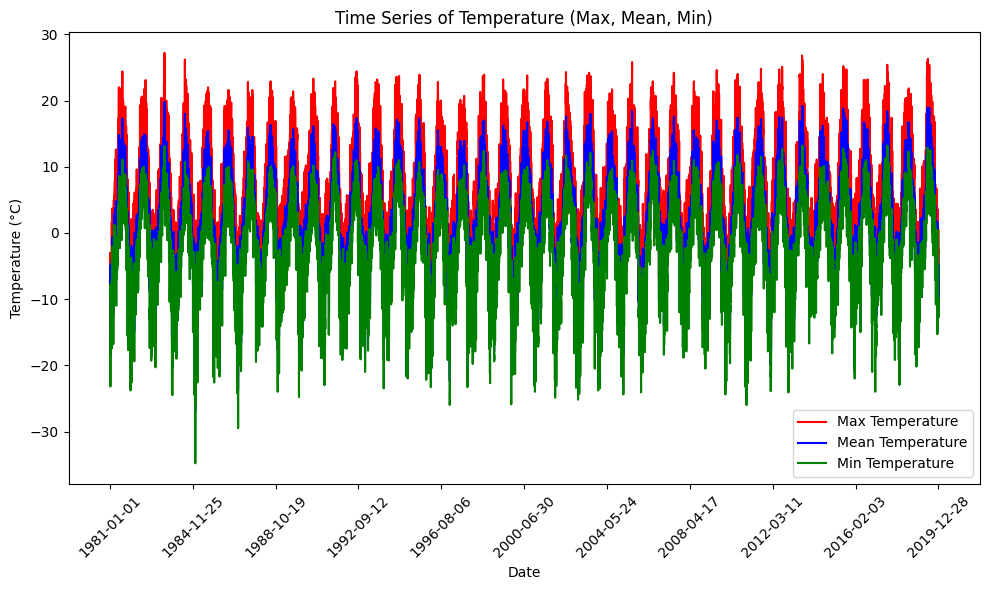

In [9]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the temperature data
plt.plot(lamah_df['date'], lamah_df['2m_temp_max'], label='Max Temperature', color='red')
plt.plot(lamah_df['date'], lamah_df['2m_temp_mean'], label='Mean Temperature', color='blue')
plt.plot(lamah_df['date'], lamah_df['2m_temp_min'], label='Min Temperature', color='green')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Time Series of Temperature (Max, Mean, Min)')

# Add a legend
plt.legend()

# Customize x-axis ticks for readability
plt.xticks(
    ticks=range(0, len(lamah_df['date']), len(lamah_df['date']) // 10),  # Show 10 evenly spaced ticks
    labels=lamah_df['date'][::len(lamah_df['date']) // 10],  # Corresponding labels
    rotation=45
)
# Show the plot
plt.tight_layout()
plt.show()

Cyclic Pattern: There is a clear annual cyclic pattern in the data, with temperatures peaking in the summer months and dipping in the winter months. This indicates a strong seasonal trend in temperature variations.
Consistency Over Time: The overall pattern of the temperature peaks and troughs appears consistent across the years, reflecting stable seasonal climatic changes.
Temperature Ranges:
Temperature Variability: The maximum temperature shows significant peaks, while the minimum temperature dips dramatically, highlighting a wide range of daily temperatures over the year.
Overlap Between Mean, Min, and Max: The mean temperature trends closely between the minimum and maximum, suggesting that extreme values are influencing the average but still follow a smooth progression.
Long-Term Changes:
No Apparent Warming Trend: From a visual inspection, there doesn’t seem to be a significant upward or downward trend in the maximum or minimum temperatures over the years, indicating that this dataset does not immediately suggest long-term climate warming or cooling.
Anomalies:
Outlier Identification: Some of the minimum temperature points (dipping below -20°C) and maximum temperature points (rising above 35°C) could represent outliers or extreme weather events. These might warrant further investigation.

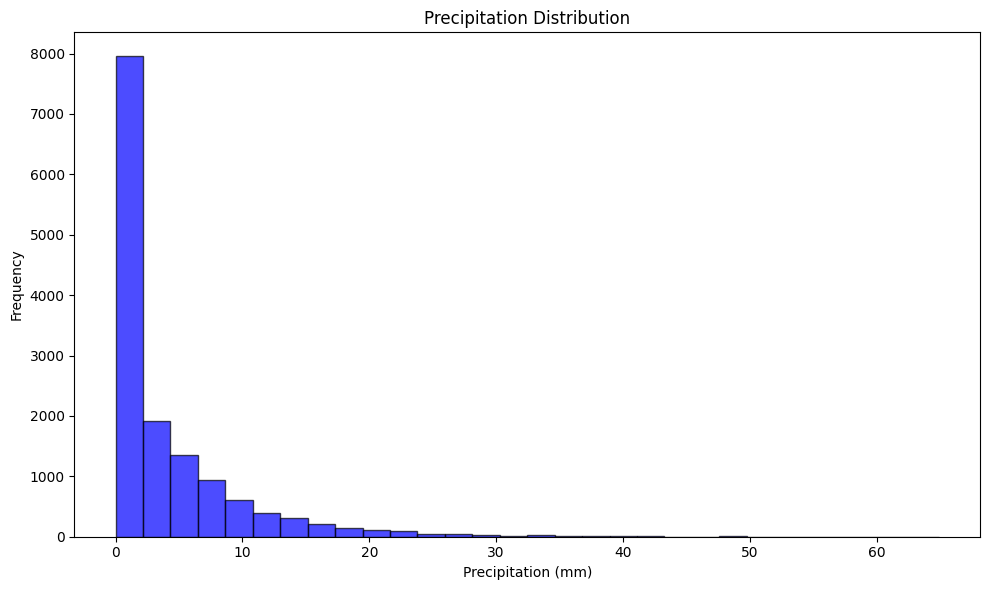

In [10]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for precipitation
plt.hist(lamah_df['prec'], bins=30, color='blue', edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.title('Precipitation Distribution')

# Show the plot
plt.tight_layout()
plt.show()

Skewed Distribution:

The precipitation data is heavily right-skewed, with most of the observations concentrated around 0-5 mm. This indicates that low precipitation events are far more common than high precipitation events.
Frequency of Zero Precipitation:

The tallest bar near 0 suggests a significant number of days with little to no precipitation.
Rare Heavy Precipitation Events:

Precipitation values greater than 20 mm are relatively rare, with only a few observations reaching as high as 60-100 mm.
Outliers or Extremes:

The presence of a long tail toward higher precipitation values might indicate occasional heavy rainfall events, which could be worth further investigation for their impact or significance.

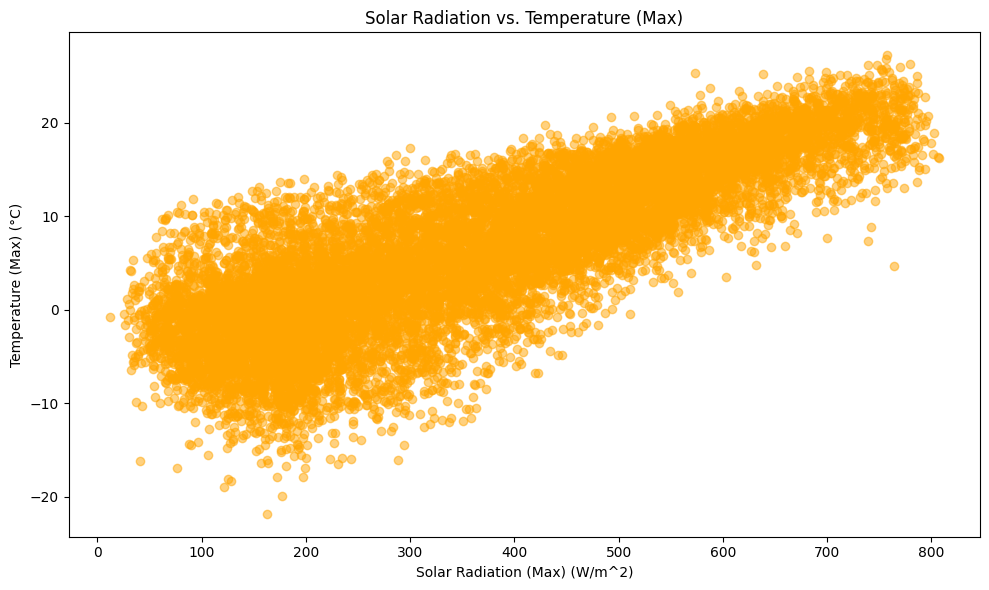

In [11]:
plt.figure(figsize=(10, 6))

# Scatter plot for Solar Radiation (Max) vs. Temperature (Max)
plt.scatter(lamah_df['surf_net_solar_rad_max'], lamah_df['2m_temp_max'], color='orange', alpha=0.5)

plt.xlabel('Solar Radiation (Max) (W/m^2)')
plt.ylabel('Temperature (Max) (°C)')
plt.title('Solar Radiation vs. Temperature (Max)')

plt.tight_layout()
plt.show()

Positive Correlation:

There is a clear positive relationship between maximum solar radiation and maximum temperature. As solar radiation increases, maximum temperature generally increases.
Wide Variability at Lower Radiation:

At lower solar radiation values (0-200 W/m²), the temperatures vary widely, ranging from -20°C to about 20°C. This suggests that other factors (e.g., seasonality, atmospheric conditions) may influence temperature more strongly at lower radiation levels.
Narrower Range at Higher Radiation:

At higher solar radiation levels (e.g., above 500 W/m²), temperatures are mostly confined to a range of approximately 10°C to 40°C, indicating that high solar radiation is strongly associated with warmer temperatures.
Clustered Data:

The scatterplot reveals dense clusters around mid-radiation and temperature values, which might correspond to typical seasonal patterns.

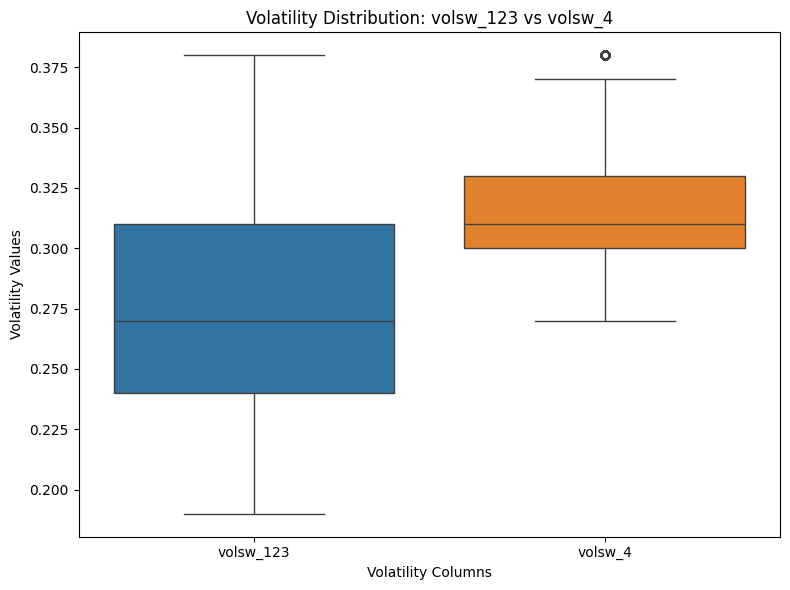

In [12]:
plt.figure(figsize=(8, 6))

# Boxplot for Volatility Distribution (volsw_123 vs volsw_4)
sns.boxplot(data=lamah_df[['volsw_123', 'volsw_4']])

# Add labels and title
plt.xlabel('Volatility Columns')
plt.ylabel('Volatility Values')
plt.title('Volatility Distribution: volsw_123 vs volsw_4')

# Show the plot
plt.tight_layout()
plt.show()

volsw_4 has higher median values and a more compact distribution, suggesting more consistency in volatility.
volsw_123 shows greater variability with a wider spread and more outliers, which may indicate less consistency or the presence of exceptional values.

Both variables have a significant number of outliers (dots outside the whiskers). However, the number and range of outliers seem more pronounced in volsw_123, especially at the lower end.

The IQR (distance between the top and bottom of the box) for volsw_123 appears larger than that of volsw_4. This suggests that the volatility values in volsw_123 are more spread out compared to volsw_4.


volsw_4 appears to have a more compact distribution (smaller spread, tighter whiskers), while volsw_123 shows more variability with a wider distribution and extreme values.

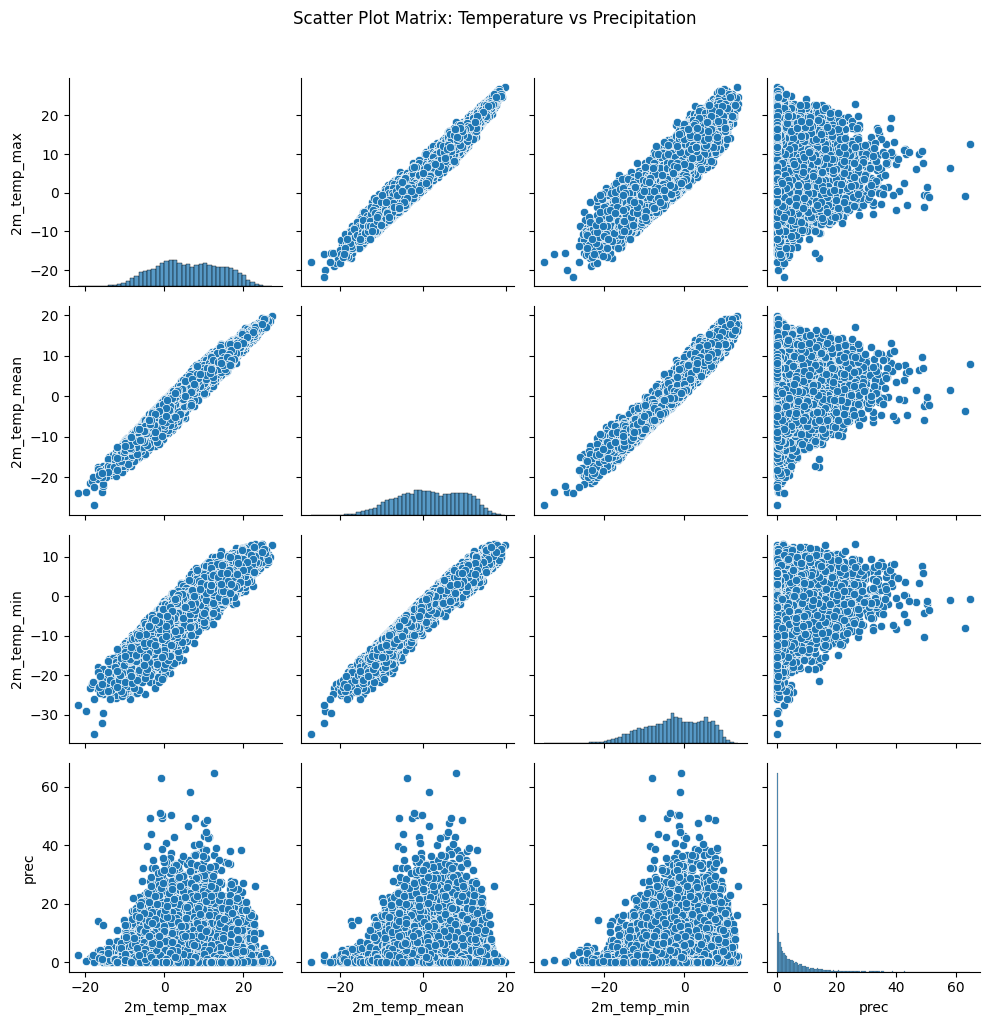

In [13]:
# Select temperature and precipitation columns
temp_columns = ['2m_temp_max', '2m_temp_mean', '2m_temp_min', 'prec']

# Create a pairplot (scatter plot matrix)
sns.pairplot(lamah_df[temp_columns])

# Add title
plt.suptitle('Scatter Plot Matrix: Temperature vs Precipitation', y=1.02)

# Show the plot
plt.tight_layout()
plt.show()

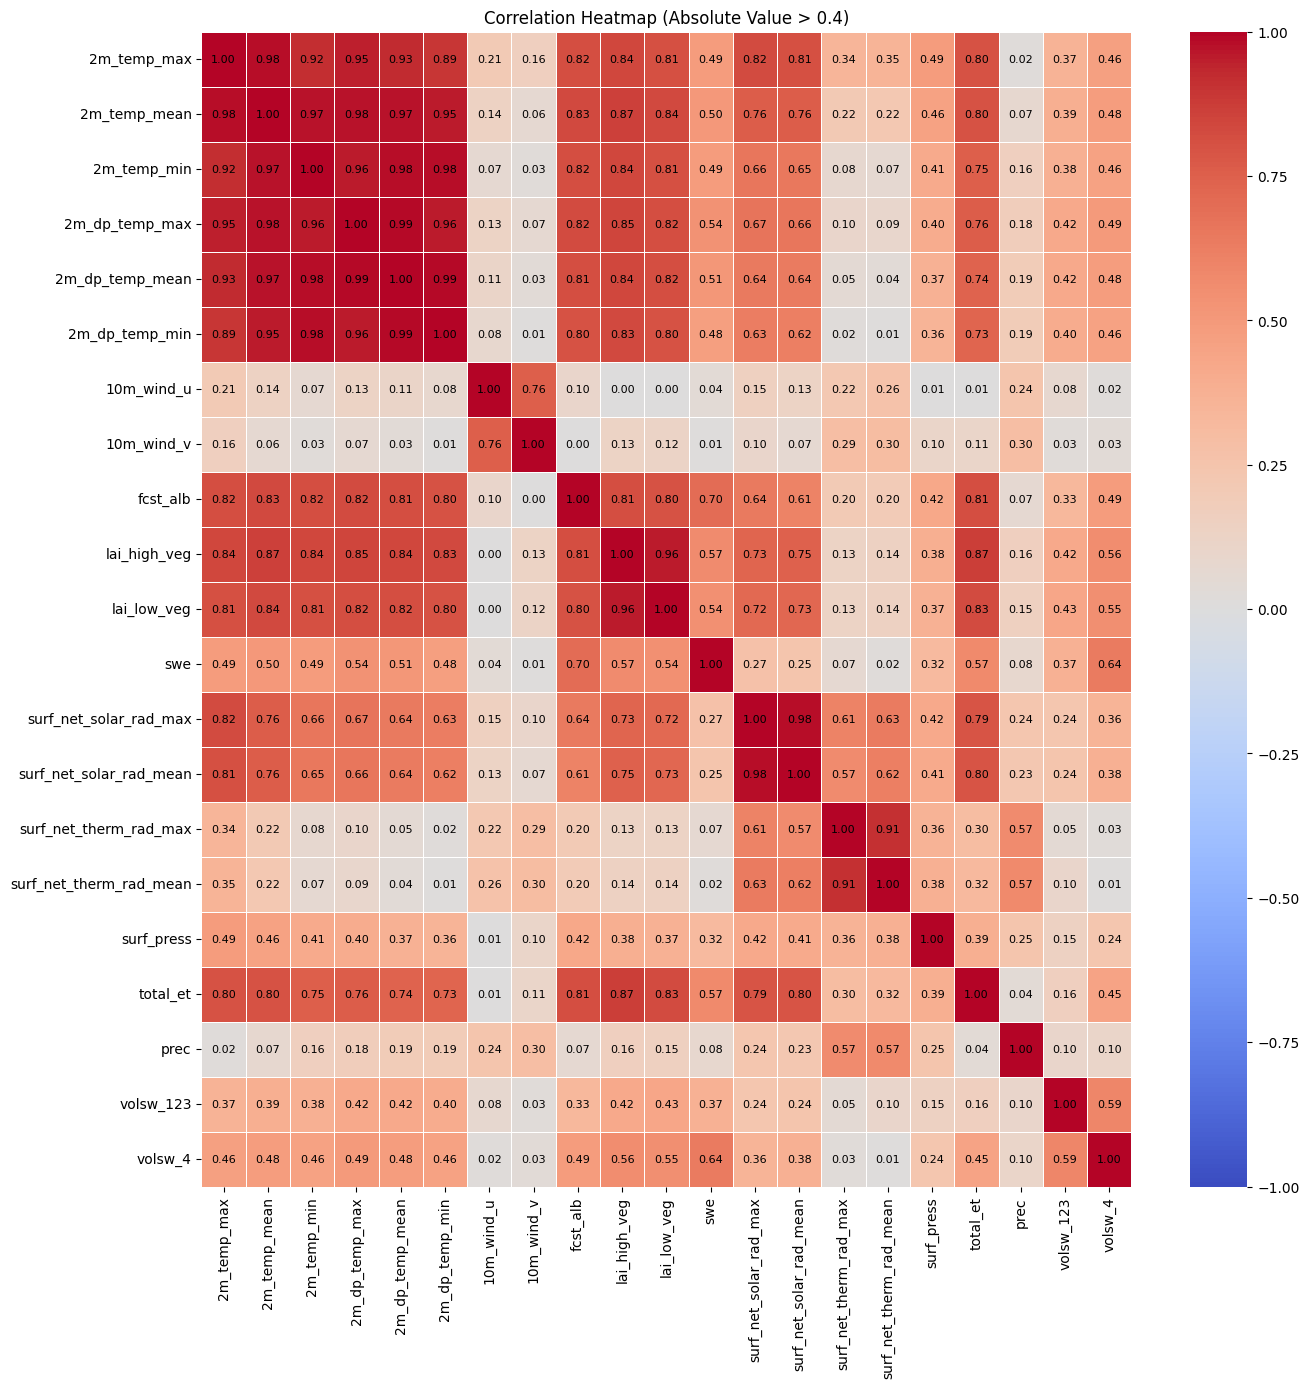

In [14]:
correlation_matrix = lamah_df.drop(columns = "date").corr().abs()

# Filter correlations greater than 0.4
# Plotting the heatmap with improved visibility
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmax=1, vmin=-1,
            fmt=".2f", linewidths=.5, annot_kws={"size": 8, "color": 'black'})
plt.title("Correlation Heatmap (Absolute Value > 0.4)")
plt.show()

Several variables exhibit strong positive correlations (values close to 1). For example:
2m_temp_max, 2m_temp_mean, and 2m_temp_min are strongly correlated with each other.
lai_high_veg and lai_low_veg have a near-perfect correlation.
Solar and thermal radiation variables (surf_net_solar_rad_max, surf_net_solar_rad_mean, surf_net_therm_rad_max, surf_net_therm_rad_mean) are highly interrelated.

The precipitation variable (prec) has relatively low correlations with most variables. This suggests it is influenced by a complex interplay of factors rather than a direct linear relationship with any single variable.


Groups of variables that are highly correlated (e.g., 2m_temp_*, lai_*, radiation variables) might provide redundant information, potentially leading to multicollinearity in models.

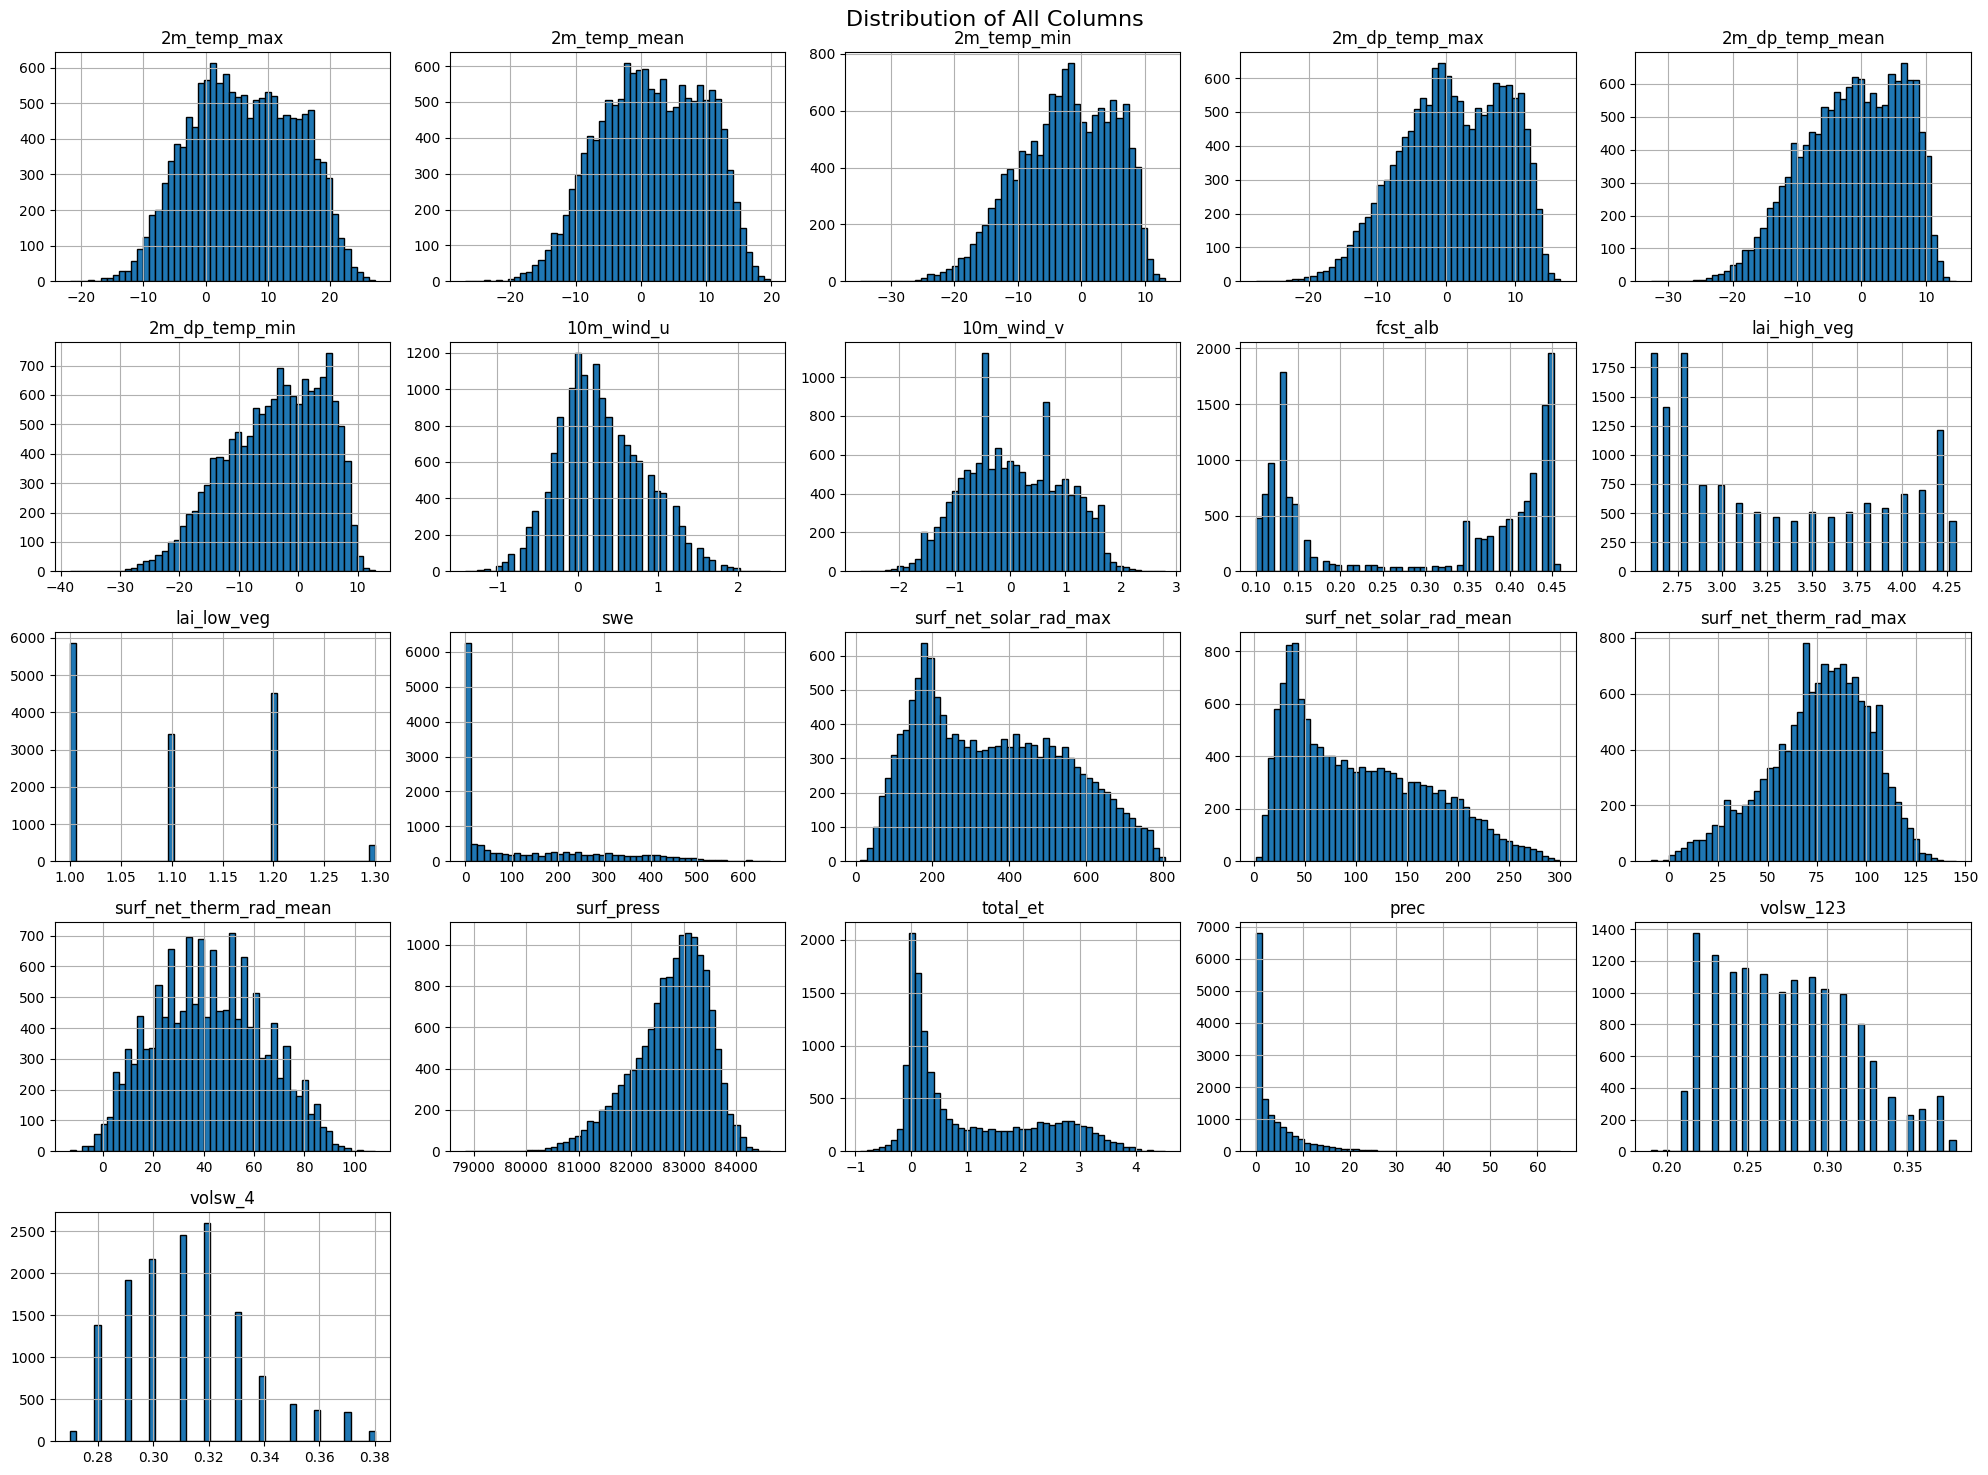

In [15]:

# Plot histograms for all columns in the dataframe
lamah_df.hist(bins=50, figsize=(20, 15), edgecolor='black')

# Add title
plt.suptitle('Distribution of All Columns', fontsize=16)
plt.tight_layout()
plt.show()

### Data Preprocessing

In [16]:

df = lamah_df.copy()
split_index = int(len(df) * 0.7)  # First 70% for training

train_data = df.iloc[:split_index]  # First 70% of the data
test_data = df.iloc[split_index:]  # Last 30% of the data

train_index = int(len(train_data) * 0.8)
train_data_final = train_data.iloc[:train_index]

# Print shapes to confirm the split
print(f"Training data: {train_data_final.shape}")
print(f"Testing data: {test_data.shape}")


Training data: (7976, 22)
Testing data: (4274, 22)


Seems we have some columns with a large number of outliers. In this case we would involve a meteorolog expert to determine if we should handle outliers accordingly. In our judgment, temperature values can have its extreme and its normal. We saw that extreme temperature values are somehow betwen 35°C and -35°C.

To the regions that are involved in our dataset these extreme temperatures could occur.
Same applies to wind temperatures.


For others, we would handle these outlier values by transforming them to mean values inside 1st and 3rd Quantile.

In [17]:
def split_data_target(df, target, drop_date=True):
    l_df = df.copy()
    target_column = l_df[target]

    # Drop the target column from the data
    data = l_df.drop(columns=target)

    # Drop the date column if drop_date is True
    if drop_date and 'date' in data.columns:
        data = data.drop(columns='date')

    return data, target_column


In [18]:
train_data, train_column = split_data_target(train_data,"prec", drop_date= True)

In [19]:
train_data.head()

,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,10m_wind_u,10m_wind_v,fcst_alb,lai_high_veg,lai_low_veg,swe,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,volsw_123,volsw_4
0,-5.2,-7.1,-9.4,-8.2,-11.5,-14.3,1.7,-1.0,0.44,2.7,1.0,255.74,122,23,57,26,82446,-0.08,0.24,0.3
1,-7.2,-8.7,-10.0,-9.3,-10.5,-12.3,1.7,-0.8,0.45,2.7,1.0,267.91,95,17,29,15,82391,0.09,0.24,0.3
2,-3.0,-4.9,-7.8,-4.4,-6.3,-9.0,1.0,0.1,0.45,2.7,1.0,280.85,134,26,41,11,81592,0.01,0.24,0.3
3,-3.5,-5.2,-8.0,-4.5,-6.8,-9.8,1.2,-0.9,0.45,2.7,1.0,293.76,118,24,62,30,81095,0.13,0.24,0.3
4,-8.1,-11.0,-12.2,-10.0,-13.2,-15.5,1.7,-1.4,0.46,2.7,1.0,304.57,54,12,69,21,81396,0.31,0.24,0.3


#### Outliers

In [20]:
# Loop over each numerical column to calculate the IQR and identify outliers
outlier_dataset = train_data.copy()

outlier_count = {}

for col in  outlier_dataset:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the outliers in the column
    outliers = train_data[(train_data[col] < lower_bound) | (train_data[col] > upper_bound)]
    outlier_count[col] = len(outliers)

# Print the count of outliers for each column
print("Outliers Count in Each Column:")
print(outlier_count)

Outliers Count in Each Column:
{'2m_temp_max': 1, '2m_temp_mean': 4, '2m_temp_min': 11, '2m_dp_temp_max': 11, '2m_dp_temp_mean': 11, '2m_dp_temp_min': 10, '10m_wind_u': 15, '10m_wind_v': 1, 'fcst_alb': 0, 'lai_high_veg': 0, 'lai_low_veg': 0, 'swe': 39, 'surf_net_solar_rad_max': 0, 'surf_net_solar_rad_mean': 0, 'surf_net_therm_rad_max': 50, 'surf_net_therm_rad_mean': 1, 'surf_press': 150, 'total_et': 0, 'volsw_123': 0, 'volsw_4': 87}


After initial outlier transformation, number of outliers at some of variables was increased. Columns which are being treated for outliers are the ones where after outlier transformation, their outlier count was reduced to 0.

Again, this would require expert domain knowledge but for the sake of experiment, we decided to involve these variables

####  Scaling Data

We employed three distinct scaling techniques:
Standard Scaler: This method involves subtracting the mean and dividing all values by the standard deviation. The result is a distribution with a mean of 0, and approximately 68% of values fall between -1 and 1 standard deviations. While suitable for data with negative values, it may distort relative distances between feature values.

MinMax Scaler: For each value, this scaler subtracts the minimum and divides by the difference between the original maximum and minimum. It scales data to a predefined interval, typically between 0 and 1. This scaler is advantageous when feature distributions are not Gaussian.

Robust Scaler: This scaler transforms the feature vector by subtracting the median and dividing by the interquartile range. It proves useful when dealing with data containing outliers, as it mitigates the impact of these extreme values.

In [21]:

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train_data)

scaled_df = pd.DataFrame(scaled_data, columns=train_data.columns)



scaled_df.head()



,2m_temp_max,2m_temp_mean,2m_temp_min,2m_dp_temp_max,2m_dp_temp_mean,2m_dp_temp_min,10m_wind_u,10m_wind_v,fcst_alb,lai_high_veg,lai_low_veg,swe,surf_net_solar_rad_max,surf_net_solar_rad_mean,surf_net_therm_rad_max,surf_net_therm_rad_mean,surf_press,total_et,volsw_123,volsw_4
0,0.338776,0.423983,0.530271,0.445205,0.462882,0.476285,0.815789,0.309091,0.944444,0.058824,0.0,0.389302,0.138365,0.071672,0.428571,0.322314,0.621426,0.152574,0.176471,0.272727
1,0.297959,0.389722,0.517745,0.420091,0.484716,0.515810,0.815789,0.345455,0.972222,0.058824,0.0,0.407827,0.104403,0.051195,0.246753,0.231405,0.611953,0.183824,0.176471,0.272727
2,0.383673,0.471092,0.563674,0.531963,0.576419,0.581028,0.631579,0.509091,0.972222,0.058824,0.0,0.427525,0.153459,0.081911,0.324675,0.198347,0.474337,0.169118,0.176471,0.272727
3,0.373469,0.464668,0.559499,0.529680,0.565502,0.565217,0.684211,0.327273,0.972222,0.058824,0.0,0.447178,0.133333,0.075085,0.461039,0.355372,0.388736,0.191176,0.176471,0.272727
4,0.279592,0.340471,0.471816,0.404110,0.425764,0.452569,0.815789,0.236364,1.000000,0.058824,0.0,0.463633,0.052830,0.034130,0.506494,0.280992,0.440579,0.224265,0.176471,0.272727


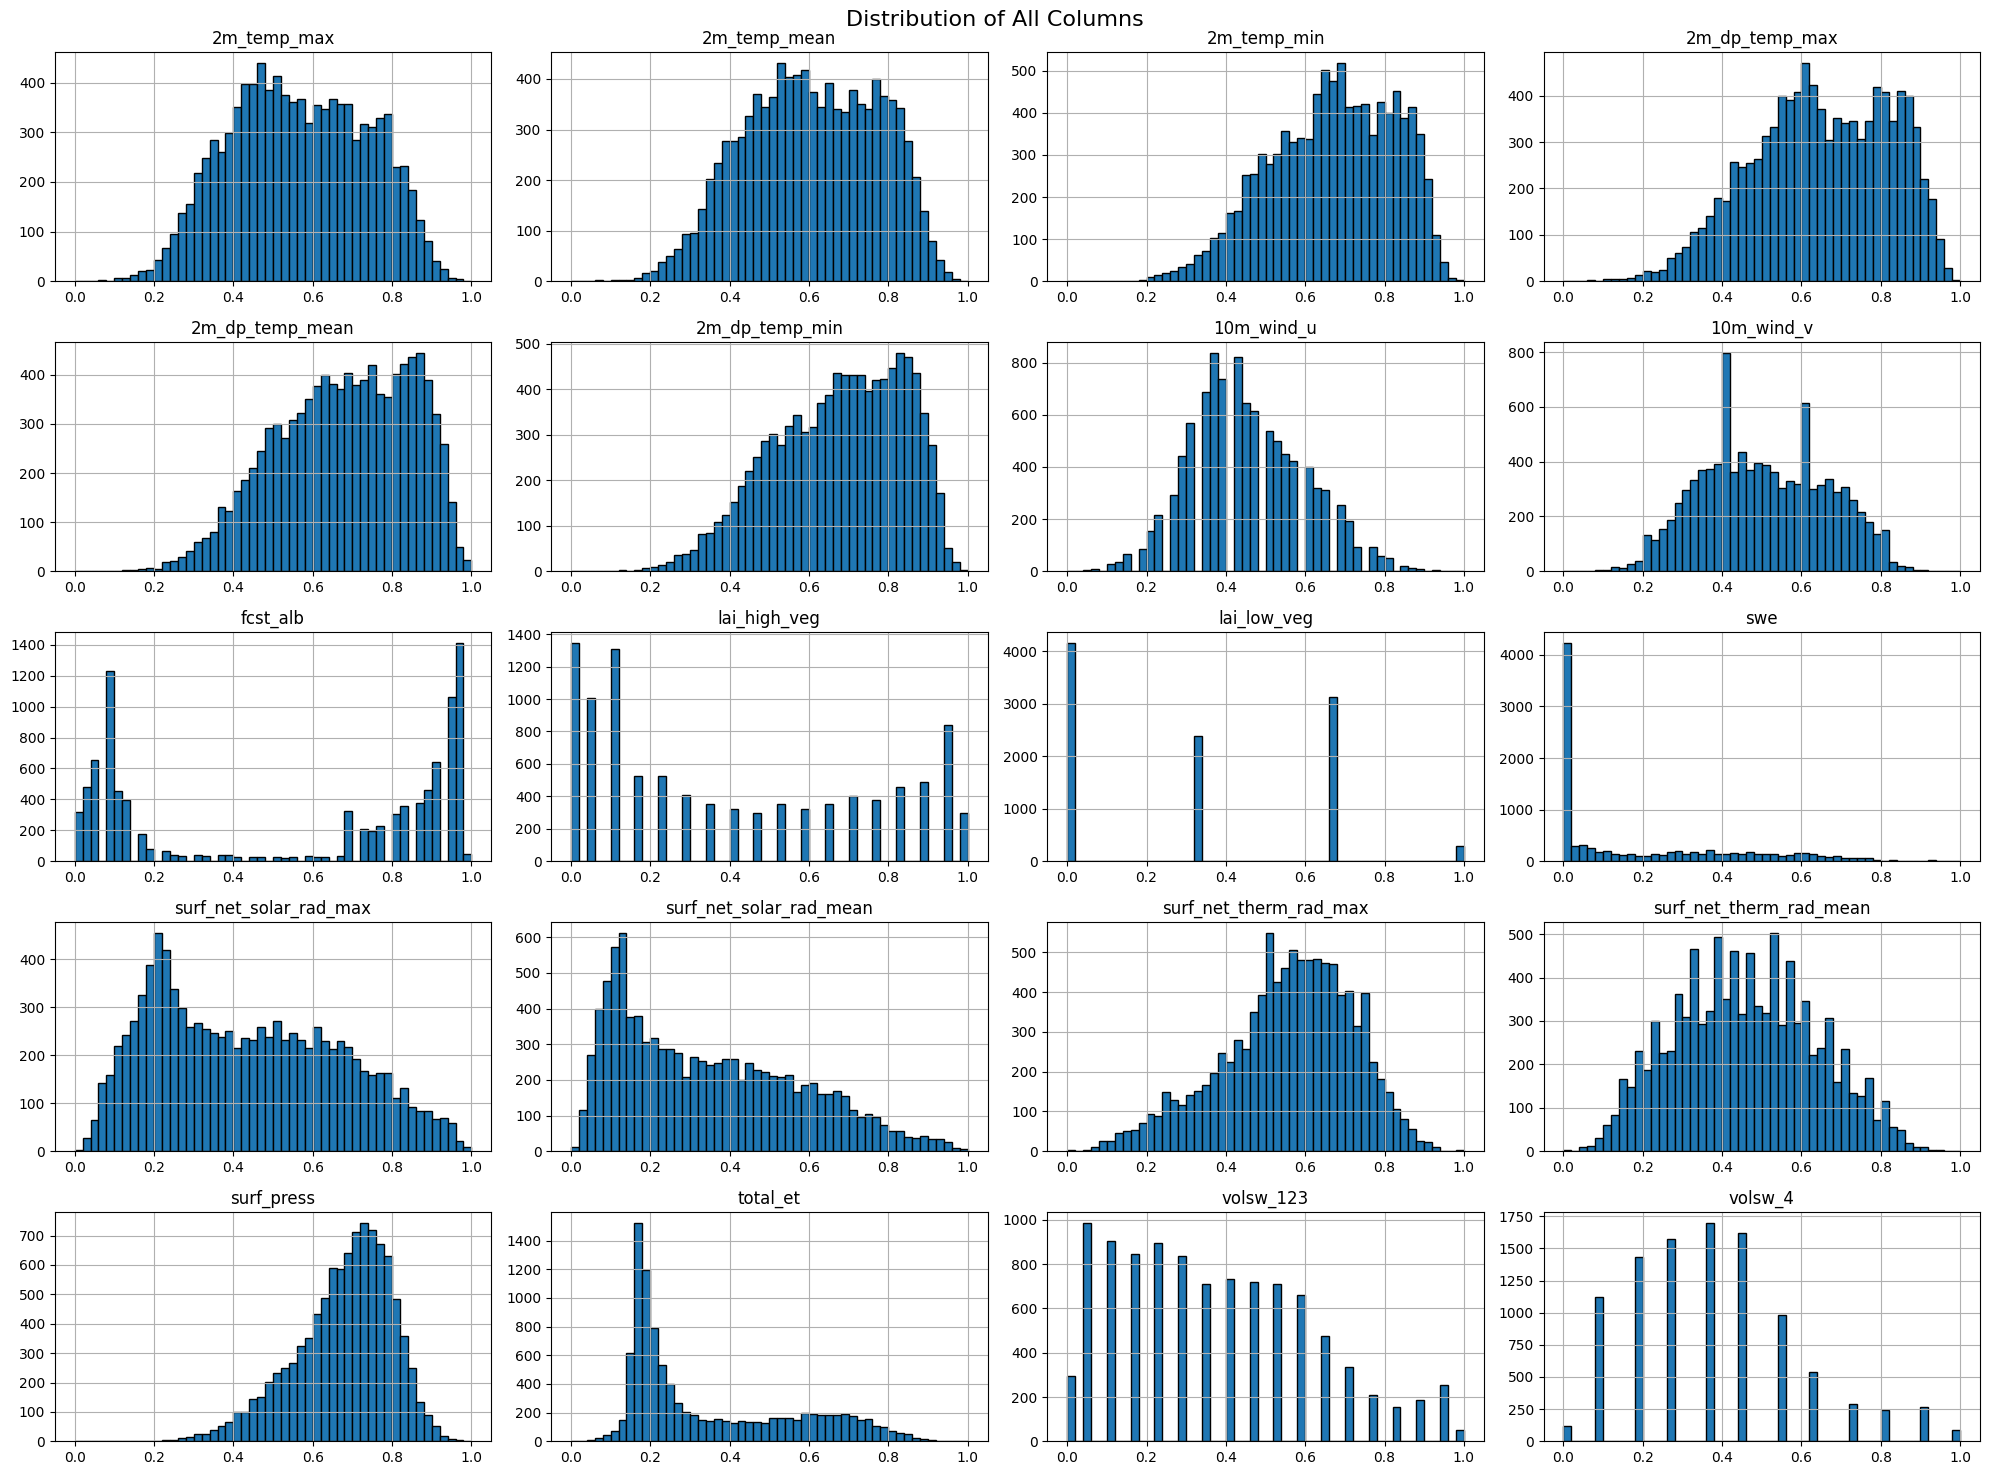

In [22]:
# Plot histograms for all columns in the dataframe
scaled_df.hist(bins=50, figsize=(20, 15), edgecolor='black')

# Add title
plt.suptitle('Distribution of All Columns', fontsize=16)
plt.tight_layout()
plt.show()

## Feature Importance

#### Ridge

In [23]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(train_data, train_column)

coefficients = ridge_model.coef_
feature_names = train_data.columns

# Pair the feature names with the coefficients
feature_importance = list(zip(feature_names, coefficients))

# Sort the features by the absolute value of their coefficients
sorted_feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Display the sorted feature importance
for feature, coef in sorted_feature_importance:
	print(
		f"Feature: {feature:<{len(max(feature_names, key=len))}}, "
		f"Coefficient: {abs(coef)}"
	)

Feature: volsw_4                , Coefficient: 16.415690926069033
Feature: fcst_alb               , Coefficient: 3.66424360859939
Feature: lai_high_veg           , Coefficient: 2.715150046986171
Feature: volsw_123              , Coefficient: 2.608233992016862
Feature: lai_low_veg            , Coefficient: 2.010906788772871
Feature: total_et               , Coefficient: 1.566481047732311
Feature: 10m_wind_v             , Coefficient: 1.1764097996222282
Feature: 2m_temp_mean           , Coefficient: 0.7418556637940878
Feature: 2m_dp_temp_max         , Coefficient: 0.5417175375471837
Feature: 10m_wind_u             , Coefficient: 0.45119536381951986
Feature: 2m_dp_temp_mean        , Coefficient: 0.44031182026215243
Feature: 2m_dp_temp_min         , Coefficient: 0.4169183805568118
Feature: 2m_temp_max            , Coefficient: 0.25803563297630167
Feature: 2m_temp_min            , Coefficient: 0.19581379548161595
Feature: surf_net_therm_rad_max , Coefficient: 0.06162162866034895
Feature: su

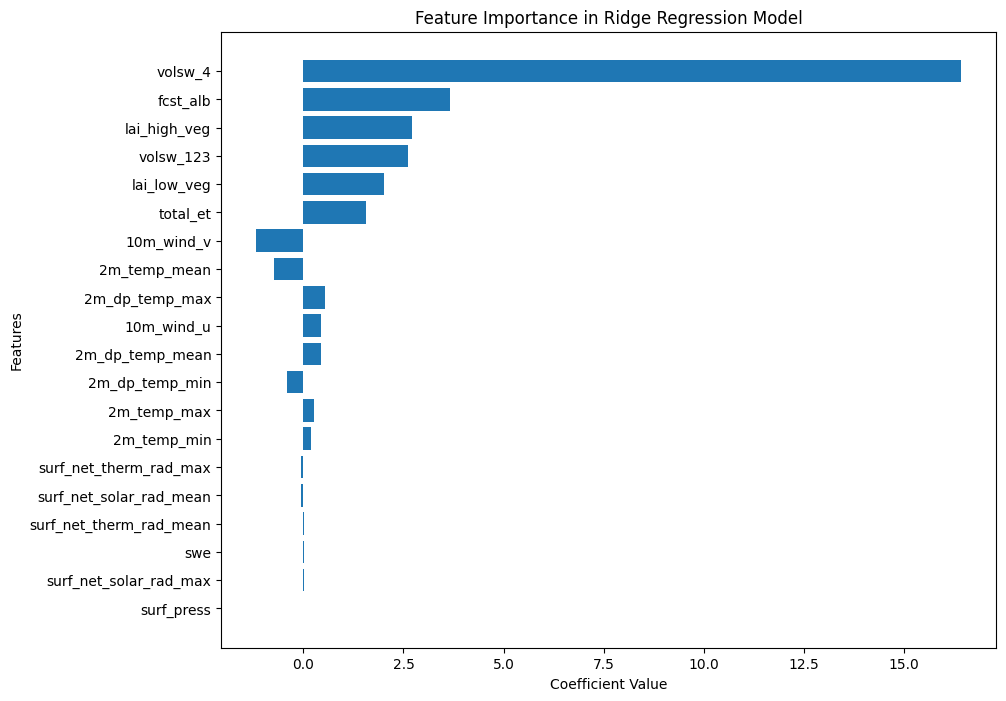

In [24]:
features, coefficients = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 8))
plt.barh(features, coefficients)  # Horizontal bar plot
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Ridge Regression Model')
plt.gca().invert_yaxis()
plt.show()

## Models

In [25]:
test_data, test_column = split_data_target(test_data,"prec")

In [26]:


# Assuming you have multiple versions of train_data (scaled and non-scaled)
train_data_versions = {'Original': train_data,
                       'Scaled': scaled_df,
                     }




# Placeholder for results
results = {}

# Iterate over each version of train_data
for version, train_data_version in train_data_versions.items():


    #Gradient Boosting regression
    xgb_model = ensemble.GradientBoostingRegressor()
    xgb_model.fit(train_data_version, train_column)
    xgb_predictions = xgb_model.predict(test_data)
    xgb_rmse = mean_squared_error(test_column,xgb_predictions,squared = False)


    # Neural Network Model (NN)
    nn_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
    nn_model.fit(train_data_version, train_column)
    nn_predictions = nn_model.predict(test_data)
    nn_rmse = mean_squared_error(test_column, nn_predictions,squared = False)

    # Deep Neural Network Model (DNN)
    dnn_model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
    dnn_model.fit(train_data_version, train_column)
    dnn_predictions = dnn_model.predict(test_data)
    dnn_rmse = mean_squared_error(test_column, dnn_predictions,squared = False)

    # Ridge Regression Model
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(train_data_version, train_column)
    ridge_predictions = ridge_model.predict(test_data)
    ridge_rmse = mean_squared_error(test_column, ridge_predictions,squared = False)

    # Store the results for comparison
    results[version] = {
        'XGB rmse': xgb_rmse,
        'NN rMSE': nn_rmse,
        'DNN rMSE': dnn_rmse,
        'Ridge rMSE': ridge_rmse
    }



# Print all the results for comparison
for version, result in results.items():
    print(f"Results for {version}:")
    for model, rmse in result.items():
        print(f"{model}: {rmse}")
    print("\n")



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

Results for Original:
XGB rmse: 3.5867912702001385
NN rMSE: 5.250989257545398
DNN rMSE: 5.410150983413767
Ridge rMSE: 4.171405158909819


Results for Scaled:
XGB rmse: 6.353172748946594
NN rMSE: 470019.40468660276
DNN rMSE: 51106.28098904238
Ridge rMSE: 899517.4028461481




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


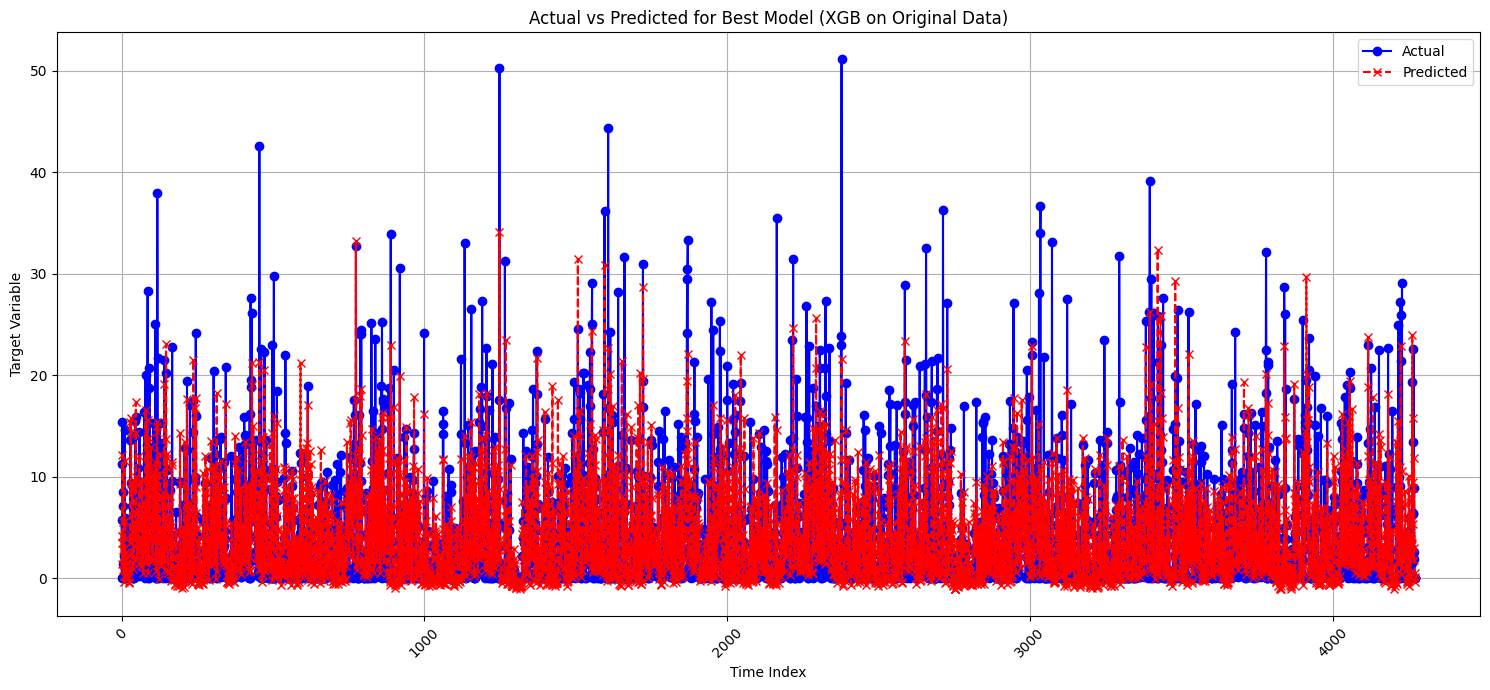

In [27]:


# Re-fit the best model on the best data version
best_train_data_version = train_data_versions['Original']  # 'Original' is the best version
best_model = ensemble.GradientBoostingRegressor()  # XGB is the best model
best_model.fit(best_train_data_version, train_column)

# Make predictions using the test data
best_model_predictions = best_model.predict(test_data)

# Plot Actual vs Predicted for the best model
plt.figure(figsize=(15, 7))
index = range(len(test_column))  # Assuming test_column is the ground truth for test data
plt.plot(index, test_column, label='Actual', color='blue', marker='o')
plt.plot(index, best_model_predictions, label='Predicted', color='red', linestyle='--', marker='x')

# Add details to the graph
plt.title('Actual vs Predicted for Best Model (XGB on Original Data)')
plt.xlabel('Time Index')
plt.ylabel('Target Variable')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


The graph provides a visual comparison of the Actual and Predicted values for the target variable using the best-performing model, the Gradient Boosting Regressor (XGB) trained on the Original dataset. This model achieved the lowest Root Mean Squared Error (RMSE) of 3.588, outperforming all other models and scaled data versions.

The plot highlights how closely the model's predictions align with the actual values. This alignment indicates the model's effectiveness in capturing patterns in the data and making accurate predictions. Any visible deviations between the lines suggest areas where the model's predictions might differ from reality, providing insights into potential areas for improvement.

Overall, this graph demonstrates the XGB model's strong predictive performance, confirming its suitability for this dataset compared to other tested models

### Hyperparameter Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid for local search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages
    'learning_rate': [0.05, 0.1, 0.2],  # Shrinkage rate
    'max_depth': [2, 3, 4],  # Depth of trees
    'subsample': [0.8, 1.0]  # Fraction of samples used
}

# Initialize the model
xgb_model = ensemble.GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_root_mean_squared_error',  # RMSE as evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available processors
)

# Perform the search
grid_search.fit(train_data_versions['Original'], train_column)

# Get the best parameters and the corresponding score
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_  # Convert back from negative to positive RMSE

print("Best Parameters:", best_params)
print("Best RMSE:", best_rmse)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150, 'subsample': 0.8}
Best RMSE: 3.1333697554211977


RMSE of the best model on test data: 3.4008189756162346


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


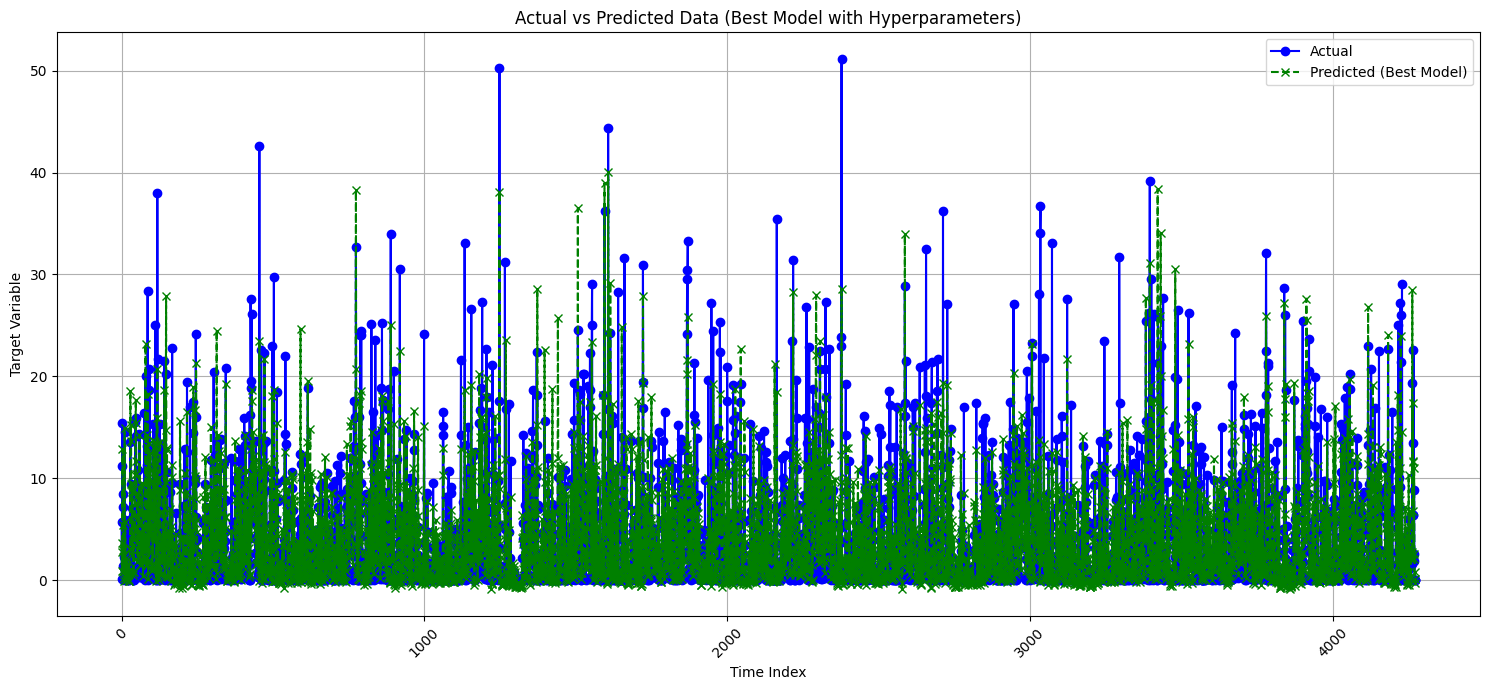

In [29]:
best_xgb_model = grid_search.best_estimator_

best_xgb_predictions = best_xgb_model.predict(test_data)


best_xgb_rmse = mean_squared_error(test_column, best_xgb_predictions, squared=False)
print(f"RMSE of the best model on test data: {best_xgb_rmse}")

# Plot the actual vs predicted data
import matplotlib.pyplot as plt

index = range(len(test_column))
plt.figure(figsize=(15, 7))
plt.plot(index, test_column, label='Actual', color='blue', marker='o')
plt.plot(index, best_xgb_predictions, label='Predicted (Best Model)', color='green', linestyle='--', marker='x')

plt.title('Actual vs Predicted Data (Best Model with Hyperparameters)')
plt.xlabel('Time Index')
plt.ylabel('Target Variable')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### Prophet - A time Series Model


In [30]:
dataset_copy = lamah_df.copy()

# Split data: 70% for training, 30% for testing
train_size = int(0.7 * len(dataset_copy))
X_data = dataset_copy.drop(columns=['prec'])
y_data = dataset_copy['prec']

X_train_data, X_test_data = X_data.iloc[:train_size], X_data.iloc[train_size:]
y_train_data, y_test_data = y_data.iloc[:train_size], y_data.iloc[train_size:]

In [31]:
from sklearn.model_selection import ParameterGrid
hyperparam_grid = {
    'changepoint_prior_scale': [0.001, 0.1],
    'seasonality_prior_scale': [0.01, 1.0]
}

param_combinations = ParameterGrid(hyperparam_grid)


In [32]:
train_data_df = pd.concat([X_train_data[['date']], y_train_data], axis=1)
train_data_df.rename(columns={'date': 'ds', 'prec': 'y'}, inplace=True)

# Additional regressors to be used in Prophet model
extra_regressors = ['surf_net_therm_rad_max', '10m_wind_u', 'surf_net_therm_rad_mean']
train_data_df = pd.concat([train_data_df, X_train_data[extra_regressors]], axis=1)



In [33]:
# Evaluation setup
from math import sqrt
from sklearn.metrics import mean_squared_error

model_results = []

for params in param_combinations:
    prophet_model = Prophet(
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale']
    )

    # Adding regressors to the model
    for regressor in extra_regressors:
        prophet_model.add_regressor(regressor)

    prophet_model.fit(train_data_df)

    # Prepare the test data for predictions
    future_test_df = pd.concat([X_test_data[['date']].rename(columns={'date': 'ds'}), X_test_data[extra_regressors]], axis=1)

    # Make predictions with the fitted model
    forecast_results = prophet_model.predict(future_test_df)
    forecast_results['yhat'] = forecast_results['yhat'].clip(lower=0)

    # Calculate RMSE for model performance evaluation
    y_predicted = forecast_results['yhat'].values
    rmse_value = sqrt(mean_squared_error(y_test_data.values, y_predicted))

    # Store results for later comparison
    model_results.append({'params': params, 'rmse': rmse_value})

    print(f"Parameters: {params}, RMSE: {rmse_value:.4f}")

# Select the best model based on RMSE
if model_results:
    optimal_params = sorted(model_results, key=lambda x: x['rmse'])[0]
    print(f'\nBest Parameters: {optimal_params}')
else:
    print("No results found. Check your grid and data.")


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqkt07h_w/jhuz1nr8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqkt07h_w/s6myxzu5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57568', 'data', 'file=/tmp/tmpqkt07h_w/jhuz1nr8.json', 'init=/tmp/tmpqkt07h_w/s6myxzu5.json', 'output', 'file=/tmp/tmpqkt07h_w/prophet_modelu3m4og6j/prophet_model-20241216171140.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:11:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:11:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqk

Parameters: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}, RMSE: 4.4421


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqkt07h_w/kmqkesb4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19823', 'data', 'file=/tmp/tmpqkt07h_w/ppjhw9ht.json', 'init=/tmp/tmpqkt07h_w/kmqkesb4.json', 'output', 'file=/tmp/tmpqkt07h_w/prophet_model1mxhzkjd/prophet_model-20241216171142.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:11:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:11:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqkt07h_w/mi7q9mgr.json


Parameters: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 1.0}, RMSE: 4.4431


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqkt07h_w/l7tsbpn6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45364', 'data', 'file=/tmp/tmpqkt07h_w/mi7q9mgr.json', 'init=/tmp/tmpqkt07h_w/l7tsbpn6.json', 'output', 'file=/tmp/tmpqkt07h_w/prophet_modelmbazqp28/prophet_model-20241216171146.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:11:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:11:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Parameters: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 0.01}, RMSE: 4.4465


DEBUG:cmdstanpy:input tempfile: /tmp/tmpqkt07h_w/92ov5utf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqkt07h_w/r5kcypcy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42637', 'data', 'file=/tmp/tmpqkt07h_w/92ov5utf.json', 'init=/tmp/tmpqkt07h_w/r5kcypcy.json', 'output', 'file=/tmp/tmpqkt07h_w/prophet_modelw7x_my6f/prophet_model-20241216171149.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:11:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:11:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Parameters: {'changepoint_prior_scale': 0.1, 'seasonality_prior_scale': 1.0}, RMSE: 4.4455

Best Parameters: {'params': {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}, 'rmse': 4.442118178018743}


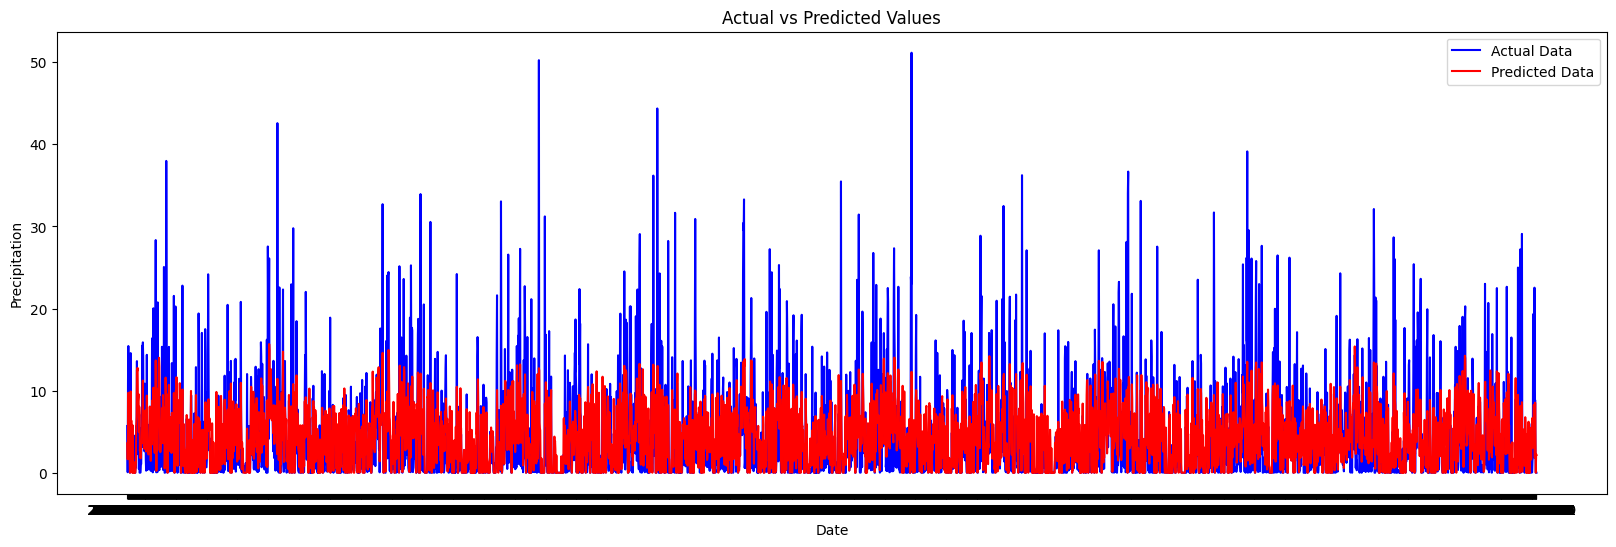

In [34]:
# Plotting actual vs predicted values
test_dates = X_test_data['date']

plt.figure(figsize=(20, 6))
plt.plot(test_dates, y_test_data.values, label='Actual Data', color='blue')
plt.plot(test_dates, forecast_results['yhat'].values, label='Predicted Data', color='red')

plt.title('Actual vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Precipitation')

plt.legend()
plt.show()

# Final Plot

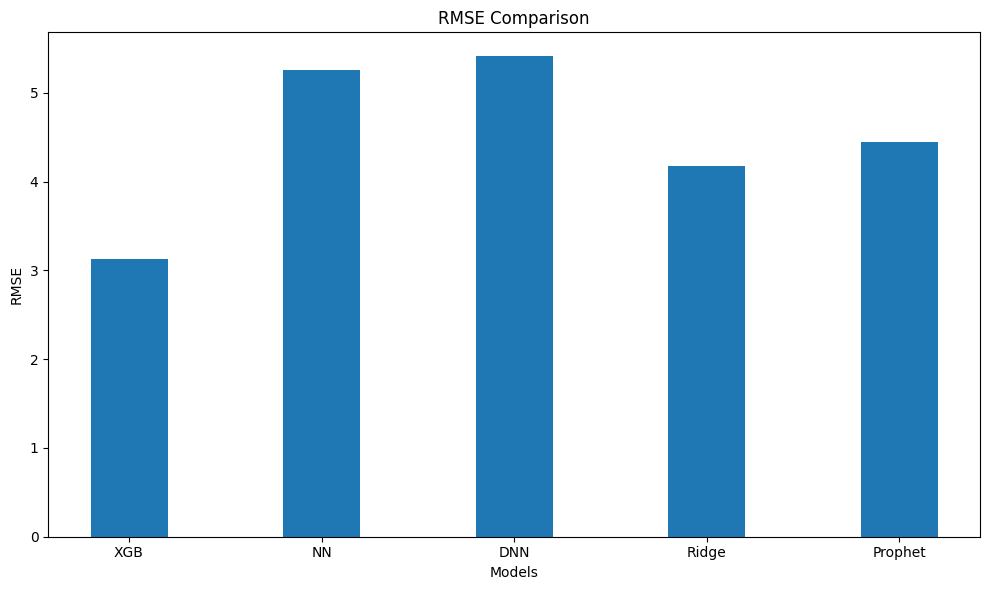

In [35]:
import matplotlib.pyplot as plt

# Data for the plot
models = ['XGB', 'NN', 'DNN', 'Ridge', 'Prophet']
original_rmse = [3.1333697554211977, 5.250989257545398, 5.410150983413767, 4.171405158909819, 4.442118178018743]

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting the RMSE values
plt.bar(models, original_rmse, width=0.4, label='Original RMSE', align='center')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('RMSE Comparison')

# Show plot
plt.tight_layout()
plt.show()